# Objective:
The objective is to check whether the person is eligible for loan or not by evaluating the data with the help of different Machine Learning classifiers which can gives the accurate result for the prediction. The aim of this Project is to provide quick, immediate and easy way to choose the deserving applicants. 


# Loan prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os as os

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Loading Dataset

In [2]:
os.getcwd()

'C:\\Users\\PAWAN PRAJAPAT'

In [3]:
os.chdir(r'C:\Users\PAWAN PRAJAPAT\OneDrive\Desktop\AI project')

In [4]:
os.getcwd()

'C:\\Users\\PAWAN PRAJAPAT\\OneDrive\\Desktop\\AI project'

In [5]:
df=pd.read_csv('./train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Gender'].mode()[0]

'Male'

In [11]:
#fill the missing values
#for numerical values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
#for categorical value
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df.head()## Data Analysis

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Data Analysis

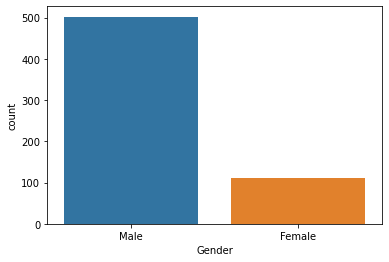

In [15]:
# for categorical values
sb.countplot(df['Gender'])


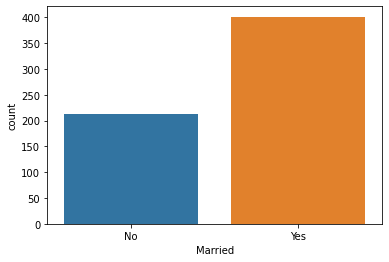

In [16]:
sb.countplot(df['Married'])

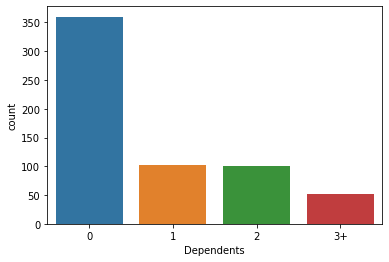

In [17]:
sb.countplot(df['Dependents'])

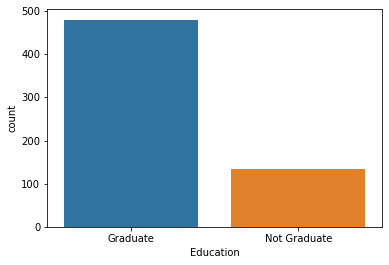

In [18]:
sb.countplot(df['Education'])

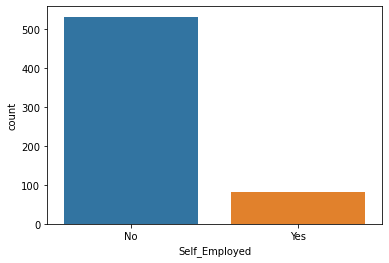

In [19]:
sb.countplot(df['Self_Employed'])

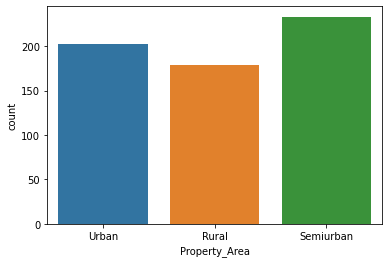

In [20]:
sb.countplot(df['Property_Area'])

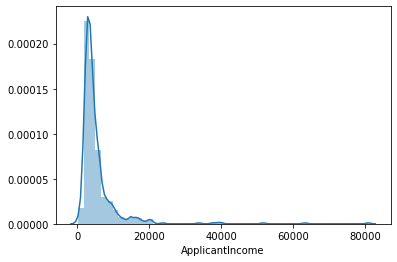

In [21]:
# for numerical values
sb.distplot(df['ApplicantIncome'])

In [22]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])

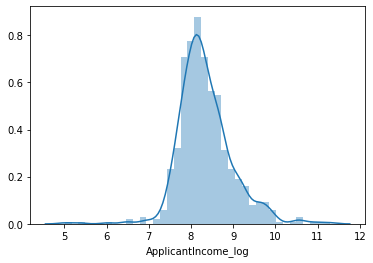

In [23]:
sb.distplot(df['ApplicantIncome_log'])

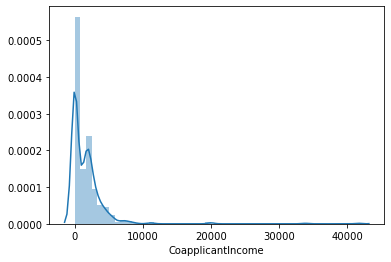

In [24]:
sb.distplot(df['CoapplicantIncome'])

In [25]:
df['CoapplicantIncome_log']=df['CoapplicantIncome'].apply(lambda x : 1 if x==0 else x)

In [26]:
df['CoapplicantIncome_log']

0         1.0
1      1508.0
2         1.0
3      2358.0
4         1.0
        ...  
609       1.0
610       1.0
611     240.0
612       1.0
613       1.0
Name: CoapplicantIncome_log, Length: 614, dtype: float64

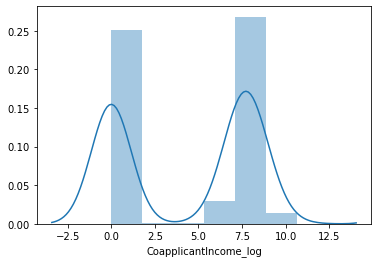

In [27]:
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome_log'])
sb.distplot(df['CoapplicantIncome_log'])

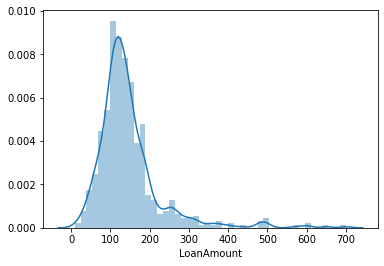

In [28]:
sb.distplot(df['LoanAmount'])

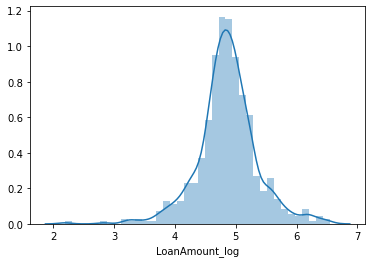

In [29]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
sb.distplot(df['LoanAmount_log'])

C:\Users\PAWAN PRAJAPAT\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


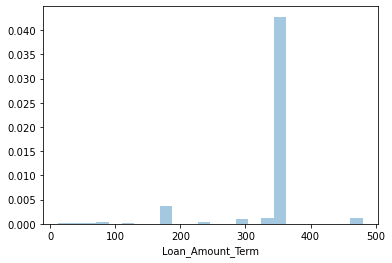

In [30]:
sb.distplot(df['Loan_Amount_Term'])

C:\Users\PAWAN PRAJAPAT\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


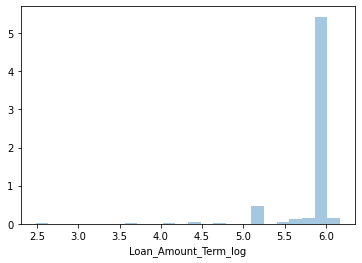

In [31]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
sb.distplot(df['Loan_Amount_Term_log'])

C:\Users\PAWAN PRAJAPAT\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


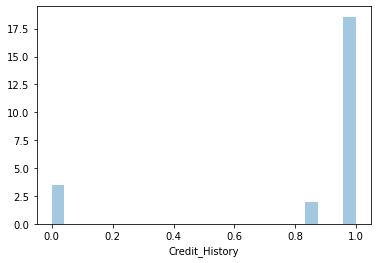

In [32]:
sb.distplot(df['Credit_History'])

In [33]:
# creating new colomn
df['Totalincome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,0.000000,4.986426,5.886104,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,5.886104,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,0.000000,4.189655,5.886104,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,5.886104,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,0.000000,4.948760,5.886104,6000.0


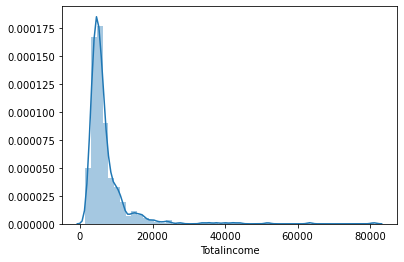

In [35]:
sb.distplot(df['Totalincome'])

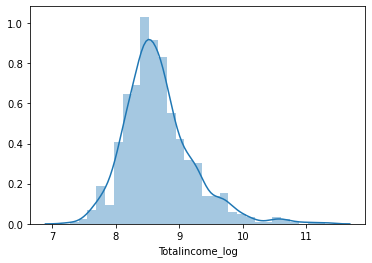

In [36]:
df['Totalincome_log']=np.log(df['Totalincome'])
sb.distplot(df['Totalincome_log'])

## Correlation Matrix

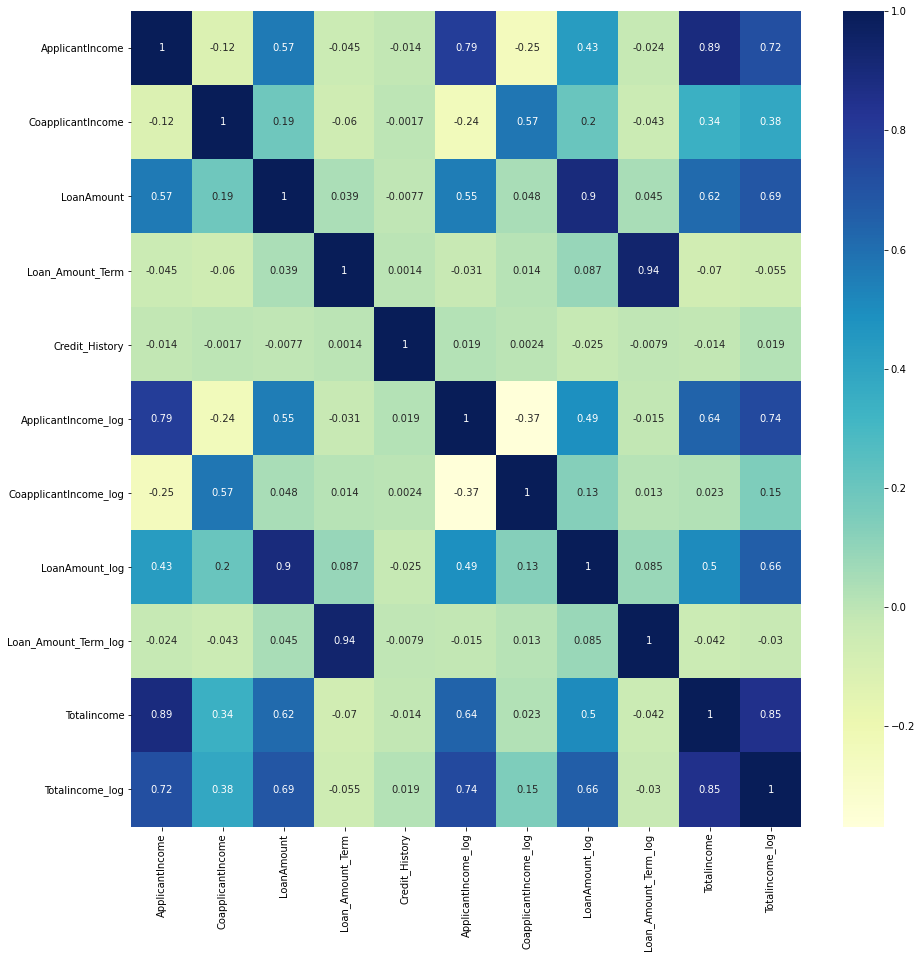

In [37]:
cor=df.corr()
plt.figure(figsize=(15,15))
sb.heatmap(cor ,annot=True ,cmap="YlGnBu")

In [38]:
# Droping unneccesary colomns
column=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','ApplicantIncome_log','CoapplicantIncome_log','Totalincome']
df=df.drop(columns=column, axis=1)

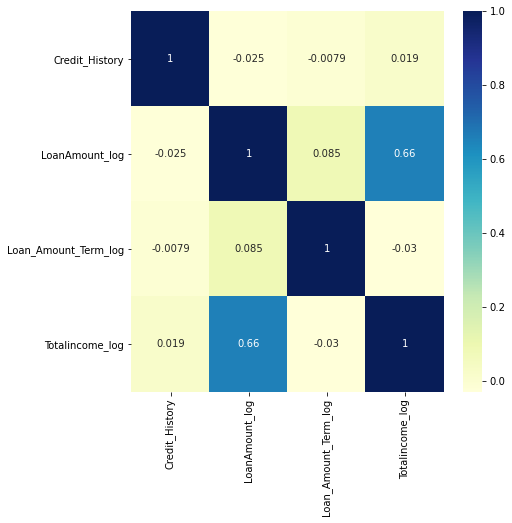

In [39]:
cor_new=df.corr()
plt.figure(figsize=(7,7))
sb.heatmap(cor_new,annot=True ,cmap="YlGnBu")

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,Totalincome_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,5.886104,8.699515


## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
colms=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for column in colms :
    df[column]=LabelEncoder().fit_transform(df[column])

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Loan_Amount_Term_log,Totalincome_log
0,1,0,0,0,0,1.0,2,1,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,4.948760,5.886104,8.699515


## Training The Model

In [44]:
x=df.drop(columns=['Loan_Status'], axis=1)
y=df['Loan_Status']

In [45]:
#spliting test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## LogisticRegression

In [46]:
lr=LogisticRegression(solver='liblinear')

In [47]:
lr.fit(x_train,y_train)
print("accuracy is ",lr.score(x_train,y_train))
cv=cross_val_score(lr,x_train,y_train,cv=10)
print("cross validation ",cv.mean())

accuracy is  0.8065268065268065
cross validation  0.8063676633444075


## DecisionTree

In [48]:
DT=DecisionTreeClassifier(criterion="entropy", random_state=0,max_depth=3)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [49]:
print("accuracy is ",DT.score(x_train,y_train))
cv=cross_val_score(DT,x_train,y_train,cv=5)
print("cross validation ",cv.mean())

accuracy is  0.8251748251748252
cross validation  0.8134883720930233


## K-nearest neighbor Classifier

In [50]:
Knclassifier=KNeighborsClassifier(n_neighbors=3)
Knclassifier.fit(x_train,y_train)
print("accuracy is ",Knclassifier.score(x_train,y_train))
cv=cross_val_score(Knclassifier,x_train,y_train,cv=10)
print("cross validation ",cv.mean())

accuracy is  0.8648018648018648
cross validation  0.7364341085271318


## NaiveBayes classifier

In [51]:
NB = GaussianNB()
NB.fit(x_train,y_train)
print("accuracy is ",NB.score(x_train,y_train))
cv=cross_val_score(NB,x_train,y_train,cv=10)
print("cross validation ",cv.mean())

accuracy is  0.8065268065268065
cross validation  0.7899778516057586


## Random Forest Classifier

In [52]:
forest=RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(x_train,y_train)
print("accuracy is ",forest.score(x_train,y_train))
cv=cross_val_score(forest,x_train,y_train,cv=10)
print("cross validation ",cv.mean())

accuracy is  0.8111888111888111
cross validation  0.8086932447397561


## AdaBoost Classifier

In [53]:
adaboost=AdaBoostClassifier()
adaboost.fit(x_train,y_train)
print("accuracy is ",adaboost.score(x_train,y_train))
cv=cross_val_score(adaboost,x_train,y_train,cv=5)
print("cross validation ",cv.mean())

accuracy is  0.8624708624708625
cross validation  0.7622435020519835


# Predicting result for test dataset

In [54]:
dtest=pd.read_csv('./test2.csv')

In [55]:
dtest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
dtest.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
dtest['Gender']=dtest['Gender'].fillna(dtest['Gender'].mode()[0])
dtest['Dependents']=dtest['Dependents'].fillna(dtest['Dependents'].mode()[0])
dtest['Self_Employed']=dtest['Self_Employed'].fillna(dtest['Self_Employed'].mode()[0])

In [58]:
dtest['LoanAmount']=dtest['LoanAmount'].fillna(dtest['LoanAmount'].mean())
dtest['Loan_Amount_Term']=dtest['Loan_Amount_Term'].fillna(dtest['Loan_Amount_Term'].mean())
dtest['Credit_History']=dtest['Credit_History'].fillna(dtest['Credit_History'].mean())

In [59]:
dtest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [60]:
dtest['ApplicantIncome_log']=np.log(dtest['ApplicantIncome'])

C:\Users\PAWAN PRAJAPAT\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
dtest['CoapplicantIncome_log']=dtest['CoapplicantIncome'].apply(lambda x : 1 if x==0 else x)

In [62]:
dtest['CoapplicantIncome_log']=np.log(dtest['CoapplicantIncome_log'])

In [63]:
dtest['LoanAmount_log']=np.log(dtest['LoanAmount'])

In [64]:
dtest['Loan_Amount_Term_log']=np.log(dtest['Loan_Amount_Term'])

In [65]:
dtest['Totalincome']=dtest['ApplicantIncome']+dtest['CoapplicantIncome']

In [66]:
dtest['Totalincome_log']=np.log(dtest['Totalincome'])

In [67]:
column=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','ApplicantIncome_log','CoapplicantIncome_log','Totalincome']
dtest=dtest.drop(columns=column, axis=1)

In [68]:
dtest.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Loan_Amount_Term_log,Totalincome_log
0,Male,Yes,0,Graduate,No,1.000000,Urban,4.700480,5.886104,8.651724
1,Male,Yes,1,Graduate,No,1.000000,Urban,4.836282,5.886104,8.428581
2,Male,Yes,2,Graduate,No,1.000000,Urban,5.337538,5.886104,8.824678
3,Male,Yes,2,Graduate,No,0.825444,Urban,4.605170,5.886104,8.494129
4,Male,No,0,Not Graduate,No,1.000000,Urban,4.356709,5.886104,8.094378


In [69]:
colms=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for column in colms :
    dtest[column]=LabelEncoder().fit_transform(dtest[column])

In [70]:
dtest.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Loan_Amount_Term_log,Totalincome_log
0,1,1,0,0,0,1.000000,2,4.700480,5.886104,8.651724
1,1,1,1,0,0,1.000000,2,4.836282,5.886104,8.428581
2,1,1,2,0,0,1.000000,2,5.337538,5.886104,8.824678
3,1,1,2,0,0,0.825444,2,4.605170,5.886104,8.494129
4,1,0,0,1,0,1.000000,2,4.356709,5.886104,8.094378


In [71]:
y_predict=forest.predict(dtest)

In [72]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [73]:
dtest['Loan_Status']=y_predict

In [74]:
dtest['Loan_Status']=dtest['Loan_Status'].apply(lambda x: 'Y' if x==1 else 'N')

In [75]:
dfinal=dtest['Loan_Status']

In [76]:
dfinal.to_csv("Loan_Prediction_result.csv")